# CNN for fNIRS data analysis for Human Activity Recognition (HAR)

In [1]:
% ls ../../../datasets/fNIRs_data/

P12-4-17-2018/  P14-4-18-2018/  P16-4-18-2018/
P13-4-17-2018/  P15-4-18-2018/  P17-4-18-2018/


In [2]:
% ls ../../../datasets/fNIRs_data/P12-4-17-2018/

1. Right Hand/  2. Both Hands/  3. Left Hand/  4. Right Leg/  5. Left Leg/


In [3]:
% ls ../../../datasets/fNIRs_data/P12-4-17-2018/1.\ Right\ Hand

2018-04-17_006/
fNIR_data.txt
head20180417-145130.txt
NIRS-2018-04-17_006_deoxyhb_T141to2511_C1to20.txt
NIRS-2018-04-17_006_oxyhb_T141to2511_C1to20.txt
Processed/
r_hand20180417-145128.txt
r_lower_arm20180417-145129.txt
r_upper_arm20180417-145129.txt


In [4]:
import numpy as np
import os
import pandas as pd

# % find ../../datasets/fNIRs_data/ | grep fNIR_data # NOT WORKING!!
def find_all(name, path):
    result = []
    for root, dirs, files in os.walk(path):
        if name in files:
            result.append(os.path.join(root, name))
    return result

allpaths = find_all(name='fNIR_data.txt', path='/home/arasdar/datasets/fNIRs_data/')
allpaths = sorted(allpaths, reverse=False)
# print(allpaths, len(allpaths))
allpaths, len(allpaths)

(['/home/arasdar/datasets/fNIRs_data/P12-4-17-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P12-4-17-2018/2. Both Hands/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P12-4-17-2018/3. Left Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P12-4-17-2018/4. Right Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P12-4-17-2018/5. Left Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P13-4-17-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P13-4-17-2018/2. Both Hands/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P13-4-17-2018/3. Left Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P13-4-17-2018/4. Right Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P13-4-17-2018/5. Left Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P14-4-18-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P14-4-18-2018/2. Both Hands/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data

In [5]:
# df: data frame object
df = []
for each_idx in range(len(allpaths)):
    file = pd.read_csv(filepath_or_buffer=allpaths[each_idx], names=['time', 'sample', 
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel'],
                         header=None)
    df.append(file)
    
for each in range(len(df)):
    print(df[each].shape)
    df[each]=df[each].drop(axis=1, columns=None, index=None, labels=['time', 'sample'])
    df[each] = df[each].dropna()
    df[each]['channel.39'] = df[each]['channel.39'].astype(str).str[1:-1].astype(float)
print(len(df))

/home/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.6/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


(2372, 42)
(1210, 42)
(2378, 42)
(1202, 42)
(1222, 42)
(2405, 42)
(1196, 42)
(2380, 42)
(1203, 42)
(1242, 42)
(2373, 42)
(1202, 42)
(2386, 42)
(1196, 42)
(1229, 42)
(2387, 42)
(1224, 42)
(2379, 42)
(1230, 42)
(1227, 42)
(2384, 42)
(1230, 42)
(2375, 42)
(1196, 42)
(1197, 42)
(2373, 42)
(1220, 42)
(2372, 42)
(1223, 42)
(1222, 42)
30


In [6]:
data, labels = [], []
for each in range(0, len(df), 1):
    dfmat = df[each].as_matrix()
    label = (each%5)+1
    print(dfmat.dtype, dfmat.shape, label)
    data.append(dfmat)
    labels.append(label)
len(data), len(labels)

float64 (2371, 40) 1
float64 (1209, 40) 2
float64 (2377, 40) 3
float64 (1201, 40) 4
float64 (1221, 40) 5
float64 (2404, 40) 1
float64 (1195, 40) 2
float64 (2379, 40) 3
float64 (1202, 40) 4
float64 (1241, 40) 5
float64 (2372, 40) 1
float64 (1201, 40) 2
float64 (2385, 40) 3
float64 (1195, 40) 4
float64 (1228, 40) 5
float64 (2386, 40) 1
float64 (1223, 40) 2
float64 (2378, 40) 3
float64 (1229, 40) 4
float64 (1226, 40) 5
float64 (2383, 40) 1
float64 (1229, 40) 2
float64 (2374, 40) 3
float64 (1195, 40) 4
float64 (1196, 40) 5
float64 (2372, 40) 1
float64 (1219, 40) 2
float64 (2371, 40) 3
float64 (1222, 40) 4
float64 (1221, 40) 5


(30, 30)

In [7]:
# This is very much like a convolution for extracting the windows
# size/width, stride/overlap, padding, dilation, num filters/out channel
def minibatching(X, Y, stride, width):
    Xmb, Ymb = [], []
    print(len(X), len(Y))
    # 1st and 1st
    for eachX in range(len(X)):
        num_mb = ((X[eachX].shape[0]-width)//stride)+1
        for each in range(num_mb):
            # The max is (num_mb-1)*stride+width==X[idx].shape[0]
            # The last each is (num_mb-1)
            # each = ((each-1)*stride)+width
            each *= stride
            Xmb.append(X[eachX][each:each+width])
            # There is only one label for one image signal or signal window or temporal window
            #Ymb.append(Y[eachX][each:each+1])
            Ymb.append(Y[eachX])
    return Xmb, Ymb

In [8]:
# Width is based on the sampling rate which is roughly about 233 points per window
# for 10sec rest and 20 sec activity
width = 250
Xmb, Ymb = minibatching(X=data, Y=labels, stride=1, width=width)
# for eachX, eachY in zip(Xmb, Ymb):
#     print(eachX.shape, eachY)
print(len(Xmb), len(Ymb))
print(Xmb[0].shape, Xmb[0].dtype)
print(Ymb[0])

30 30
42935 42935
(250, 40) float64
1


In [9]:
# Conversion from python list to numpy array
X, Y=np.array(object=Xmb, dtype=float), np.array(object=Ymb, dtype=int)
print(X.shape, X.dtype, Y.shape, Y.dtype)

(42935, 250, 40) float64 (42935,) int64


In [10]:
# Now I should devide the data into train and test
# Train and valid split
from sklearn.model_selection import train_test_split

# 30% of the training data/ entire training data is assigned to validation.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
print(Xtrain.dtype, Xtest.dtype, Ytrain.dtype, Ytest.dtype)

(30054, 250, 40) (12881, 250, 40) (30054,) (12881,)
float64 float64 int64 int64


In [11]:
# # standardizing/normalizing the train and test data
# def standardize(train, test):
# """ Standardize data """
# # Standardize train and test
# X_train = (train - np.mean(train, axis=0)[None,:,:]) / np.std(train, axis=0)[None,:,:]
# X_test = (test - np.mean(test, axis=0)[None,:,:]) / np.std(test, axis=0)[None,:,:]
# return X_train, X_test

Xtrain = (Xtrain - Xtrain.mean(axis=0))/ Xtrain.std(axis=0)
Xtest = (Xtest - Xtest.mean(axis=0))/ Xtest.std(axis=0)
print(Xtrain.shape, Xtrain.dtype)
print(Xtest.shape, Xtest.dtype)

(30054, 250, 40) float64
(12881, 250, 40) float64


In [12]:
print(Xtrain.mean(axis=0), Xtrain.std(axis=0))

[[ 1.40043105e-17 -5.13169692e-17  2.25302796e-17 ...  2.37825775e-17
   1.03515903e-16  3.79383459e-17]
 [-1.81601663e-17  1.20554912e-16 -2.31250287e-18 ...  1.81564722e-17
   4.40336010e-18 -4.64753972e-17]
 [ 1.47763762e-18  1.23180489e-16 -6.99661412e-18 ...  1.01343776e-16
   5.51749887e-17 -8.19387000e-17]
 ...
 [ 7.03798798e-17  7.88596726e-18 -8.83627296e-18 ... -1.15436745e-16
  -5.94453614e-17 -9.88835094e-17]
 [ 4.09047034e-17  1.90296175e-16  6.60282370e-17 ...  3.67931767e-17
  -7.68076034e-17  2.56037658e-17]
 [-4.83556911e-17  2.23446514e-17 -4.54004158e-18 ... -1.02289464e-17
  -3.45619439e-17 -3.15253986e-17]] [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [13]:
print(Xtest.mean(axis=0), Xtest.std(axis=0))

[[ 7.98815852e-17 -8.57770324e-17 -4.38710907e-17 ... -3.61570188e-17
   7.18141312e-17 -9.29567217e-17]
 [ 5.19040684e-17  7.18486075e-17 -9.60337314e-17 ...  7.64770507e-17
   1.06307669e-16 -4.17421792e-17]
 [ 1.03963280e-16  9.01210461e-17  1.33595659e-18 ...  1.04195995e-16
   1.47903324e-16  6.36260102e-17]
 ...
 [-6.62634470e-17 -1.56936114e-16  1.73329594e-17 ... -6.61944944e-18
   4.85167720e-17  6.83923585e-17]
 [ 8.54495075e-17  1.84137914e-16 -4.93700604e-17 ...  8.20363539e-17
  -1.34293804e-16  6.71253545e-17]
 [ 3.38902021e-17  8.90867571e-17 -4.69481004e-17 ... -6.02214756e-17
  -3.05115248e-18 -9.96796000e-17]] [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [14]:
# Onehotencoding of the output labels
def onehot(labels, n_class):
	""" One-hot encoding """
	expansion = np.eye(n_class)
	y = expansion[:, labels-1].T
	assert y.shape[1] == n_class, "Wrong number of labels!"

	return y

print(Y.max(axis=0), Ytrain.max(axis=0), Ytest.max(axis=0))
# # assert Y.max(axis=0) == Ytrain.max(axis=0) == Ytest.max(axis=0), 'wrong labels'
Ytrain=onehot(labels=Ytrain, n_class=Ytrain.max(axis=0))
Ytest=onehot(labels=Ytest, n_class=Ytest.max(axis=0))
print(Ytrain.shape, Ytrain.dtype, Ytest.shape, Ytest.dtype)

5 5 5
(30054, 5) float64 (12881, 5) float64


In [15]:
# Now separating train and validation set
# 30% of the training data/ entire training data is assigned to validation.
Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(Xtrain, Ytrain, test_size=0.30)
print(Xtrain.shape, Xvalid.shape, Xtest.shape, Xtrain.dtype, Xvalid.dtype, Xtest.dtype)
print(Ytrain.shape, Yvalid.shape, Ytest.shape, Ytrain.dtype, Yvalid.dtype, Ytest.dtype)

(21037, 250, 40) (9017, 250, 40) (12881, 250, 40) float64 float64 float64
(21037, 5) (9017, 5) (12881, 5) float64 float64 float64


In [16]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


In [17]:
# now I can design the actual input and output tensors
N, W, Cin = Xvalid.shape[0], Xvalid.shape[1], Xvalid.shape[2]
X = tf.placeholder(dtype=tf.float32, name=None, shape=[N, W, Cin])
print(X.shape, X.dtype, Xtrain.shape, Xtrain.dtype, Xvalid.shape, Xvalid.dtype, Xtest.shape, Xtest.dtype)

(9017, 250, 40) <dtype: 'float32'> (21037, 250, 40) float64 (9017, 250, 40) float64 (12881, 250, 40) float64


In [18]:
# This is the output tensor for labels
N, Cout = Yvalid.shape[0], Yvalid.shape[1]
Y = tf.placeholder(dtype=tf.float32, name=None, shape=[N, Cout])
print(Y.shape, Y.dtype, Ytrain.shape, Ytrain.dtype, Yvalid.shape, Yvalid.dtype, Ytest.shape, Ytest.dtype)

(9017, 5) <dtype: 'float32'> (21037, 5) float64 (9017, 5) float64 (12881, 5) float64


In [19]:
print(X.shape, X.dtype)
Wwidth, Wchannels, Wnumber = X.shape[1].value//2, X.shape[2].value, X.shape[2].value*2
shape = [Wwidth, Wchannels, Wnumber]
initial_value=tf.random_normal(dtype=X.dtype, mean=0.0, name=None, shape=shape, stddev=1.0)
Wconv = tf.Variable(dtype=X.dtype, initial_value=initial_value, name=None, trainable=True)
print(Wconv.shape, Wconv.dtype)
Xconv = tf.nn.conv1d(data_format='NWC', filters=Wconv, name=None, padding='SAME', stride=2, use_cudnn_on_gpu=True, 
                     value=X)
Xconv = tf.maximum(name=None, x=(-0.1*Xconv), y=Xconv)
print(Xconv.shape, Xconv.dtype)

(9017, 250, 40) <dtype: 'float32'>
(125, 40, 80) <dtype: 'float32_ref'>
(9017, 125, 80) <dtype: 'float32'>


In [20]:
# This is the multiplication layer
# this part is flatening the input
shape = [Xconv.shape[0].value, Xconv.shape[1].value*Xconv.shape[2].value]
Xconv_reshaped = tf.reshape(name=None, shape=shape, tensor=Xconv)
print(Xconv_reshaped.shape, Xconv_reshaped.dtype)
# their first axis or dimension stay the same
shape = [Xconv_reshaped.shape[1].value, Y.shape[1].value]
initial_value = tf.random_normal(dtype=Xconv_reshaped.dtype, mean=0.0, name=None, shape=shape, stddev=1.0)
W = tf.Variable(dtype=Xconv_reshaped.dtype, initial_value=initial_value, name=None, trainable=True)
print(W.shape, W.dtype)
# The actual multiplication
# Y_ = Xconv_reshaped @ W
Y_ = tf.matmul(a=Xconv_reshaped, b=W, name=None)
print(Y_.shape, Y_.dtype)
print(Y.shape, Y.dtype)

(9017, 10000) <dtype: 'float32'>
(10000, 5) <dtype: 'float32_ref'>
(9017, 5) <dtype: 'float32'>
(9017, 5) <dtype: 'float32'>


In [21]:
# Now I need to calculate the loss
loss_tensor = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=Y_, name=None)
print(loss_tensor.shape, loss_tensor.dtype)
loss = tf.reduce_mean(axis=0, input_tensor=loss_tensor, name=None)
print(loss)

(9017,) <dtype: 'float32'>
Tensor("Mean:0", shape=(), dtype=float32)


In [22]:
# Backprop and SGD now using adam
opt = tf.train.AdamOptimizer().minimize(loss)
print(opt)

name: "Adam"
op: "NoOp"
input: "^Adam/update_Variable/ApplyAdam"
input: "^Adam/update_Variable_1/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"



In [23]:
print(Y_.shape, Y_.dtype, Y.shape, Y.dtype)

(9017, 5) <dtype: 'float32'> (9017, 5) <dtype: 'float32'>


In [24]:
# Accuracy
# tf.argmax(
#     input,
#     axis=None,
#     name=None,
#     dimension=None,
#     output_type=tf.int64
# )
# Y_NxCout, N:axis 1, Cout: axis 2
Y_argmax = tf.argmax(axis=1, name=None, input=Y_)
print(Y_argmax.shape, Y_argmax.dtype)
Yargmax = tf.argmax(axis=1, name=None, input=Y)
print(Yargmax.shape, Yargmax.dtype)

acc_tensor = tf.equal(name=None, x=Y_argmax, y=Yargmax)
print(acc_tensor.shape, acc_tensor.dtype)
# cast bool to int datatype for equal
acc_tensor = tf.cast(dtype=tf.float32, name=None, x=acc_tensor)
print(acc_tensor.shape, acc_tensor.dtype)
acc = tf.reduce_mean(axis=0, input_tensor=acc_tensor)
print(acc.shape, acc.dtype)

(9017,) <dtype: 'int64'>
(9017,) <dtype: 'int64'>
(9017,) <dtype: 'bool'>
(9017,) <dtype: 'float32'>
() <dtype: 'float32'>


In [25]:
def get_batches(X, Y, batch_size):
    """ Return a generator for batches """
    n_batches = len(X) // batch_size
    X, Y = X[:n_batches*batch_size], Y[:n_batches*batch_size]

    # Loop over batches and yield
    for b in range(0, len(X), batch_size):
        yield X[b:b+batch_size], Y[b:b+batch_size]

In [26]:
# We should save the after training and validation
saver = tf.train.Saver() 
train_loss_mean, valid_loss_mean = [], []
train_acc_mean, valid_acc_mean = [], []

# now that we can calculate loss and optimize, we can start a session for calculating the error.
with tf.Session() as sess:
    sess.run(fetches=tf.global_variables_initializer())
    
    # for every epoch start feeding the arrays into the tensors in the model
    for epoch in range(0, 1000, 1):
        train_loss, valid_loss = [], []
        train_acc, valid_acc = [], []
        
        # Training minibatches and feed them into the tensor
        for Xarr, Yarr in get_batches(X=Xtrain, Y=Ytrain, batch_size=Xvalid.shape[0]):
            # X_NxWxCin, Y_NxCout
            feed_dict = {X:Xarr, Y:Yarr}
            lossarr, _, accarr = sess.run(feed_dict=feed_dict, fetches=[loss, opt, acc])
            train_loss.append(lossarr)
            train_acc.append(accarr)
            
        # Validation now which is one batch on every iteration
        for Xarr, Yarr in get_batches(X=Xvalid, Y=Yvalid, batch_size=Xvalid.shape[0]): 
            # X_NxWxCin, Y_NxCout
            feed_dict = {X:Xarr, Y:Yarr}
            lossarr, accarr = sess.run(feed_dict=feed_dict, fetches=[loss, acc])
            valid_loss.append(lossarr)
            valid_acc.append(accarr)
        
        # printing out train and validation loss
        print('epoch:', epoch+1, 'train_loss:', np.mean(train_loss), 'valid_loss:', np.mean(valid_loss),
             'train_acc:', np.mean(train_acc), 'valid_acc:', np.mean(valid_acc))
        
        # Every epoch, for drawing the plot and their learning curve
        train_loss_mean.append(np.mean(train_loss))
        valid_loss_mean.append(np.mean(valid_loss))
        train_acc_mean.append(np.mean(train_acc))
        valid_acc_mean.append(np.mean(valid_acc))
        
    # After all epochs and at the end of training and validation
    saver.save(sess,'checkpoints/cnn-fnirs-har.ckpt')

epoch: 1 train_loss: 5121.334 valid_loss: 3748.1282 train_acc: 0.26971278 valid_acc: 0.2860153
epoch: 2 train_loss: 3404.0205 valid_loss: 2624.844 train_acc: 0.26827103 valid_acc: 0.26128423
epoch: 3 train_loss: 2502.4678 valid_loss: 2323.0046 train_acc: 0.2521903 valid_acc: 0.27692136
epoch: 4 train_loss: 2212.067 valid_loss: 1924.8176 train_acc: 0.2789176 valid_acc: 0.27015638
epoch: 5 train_loss: 1769.689 valid_loss: 1400.1132 train_acc: 0.2771986 valid_acc: 0.27681047
epoch: 6 train_loss: 1268.7295 valid_loss: 1017.82635 train_acc: 0.27187535 valid_acc: 0.23988022
epoch: 7 train_loss: 951.7152 valid_loss: 894.6488 train_acc: 0.25135854 valid_acc: 0.26882556
epoch: 8 train_loss: 855.3025 valid_loss: 843.7209 train_acc: 0.2727071 valid_acc: 0.27625597
epoch: 9 train_loss: 761.7766 valid_loss: 612.6397 train_acc: 0.28379726 valid_acc: 0.34523678
epoch: 10 train_loss: 569.6199 valid_loss: 531.6949 train_acc: 0.37673283 valid_acc: 0.39625153
epoch: 11 train_loss: 497.33557 valid_loss: 4

epoch: 87 train_loss: 31.438358 valid_loss: 33.910286 train_acc: 0.84961736 valid_acc: 0.8437396
epoch: 88 train_loss: 31.013988 valid_loss: 33.495117 train_acc: 0.8516691 valid_acc: 0.84518135
epoch: 89 train_loss: 30.602188 valid_loss: 33.082928 train_acc: 0.8531108 valid_acc: 0.84651214
epoch: 90 train_loss: 30.194344 valid_loss: 32.670635 train_acc: 0.853998 valid_acc: 0.84817564
epoch: 91 train_loss: 29.791212 valid_loss: 32.270584 train_acc: 0.8547743 valid_acc: 0.8499501
epoch: 92 train_loss: 29.394224 valid_loss: 31.869226 train_acc: 0.8564378 valid_acc: 0.8519463
epoch: 93 train_loss: 29.002346 valid_loss: 31.459045 train_acc: 0.8579905 valid_acc: 0.85349894
epoch: 94 train_loss: 28.616241 valid_loss: 31.097378 train_acc: 0.8592658 valid_acc: 0.85471886
epoch: 95 train_loss: 28.237682 valid_loss: 30.735853 train_acc: 0.86059666 valid_acc: 0.8564933
epoch: 96 train_loss: 27.868942 valid_loss: 30.36384 train_acc: 0.8614838 valid_acc: 0.8577132
epoch: 97 train_loss: 27.50415 vali

epoch: 172 train_loss: 12.329479 valid_loss: 14.779029 train_acc: 0.9259732 valid_acc: 0.9178219
epoch: 173 train_loss: 12.217733 valid_loss: 14.660808 train_acc: 0.9266386 valid_acc: 0.9179328
epoch: 174 train_loss: 12.107006 valid_loss: 14.549437 train_acc: 0.92735946 valid_acc: 0.9182655
epoch: 175 train_loss: 11.99752 valid_loss: 14.434343 train_acc: 0.9279694 valid_acc: 0.9189309
epoch: 176 train_loss: 11.89092 valid_loss: 14.315993 train_acc: 0.92857933 valid_acc: 0.9195963
epoch: 177 train_loss: 11.783695 valid_loss: 14.211712 train_acc: 0.9291339 valid_acc: 0.9198181
epoch: 178 train_loss: 11.678003 valid_loss: 14.109973 train_acc: 0.9296329 valid_acc: 0.92026174
epoch: 179 train_loss: 11.574734 valid_loss: 13.998531 train_acc: 0.93018746 valid_acc: 0.92059445
epoch: 180 train_loss: 11.471933 valid_loss: 13.884702 train_acc: 0.9310746 valid_acc: 0.92103803
epoch: 181 train_loss: 11.370491 valid_loss: 13.780915 train_acc: 0.931241 valid_acc: 0.92103803
epoch: 182 train_loss: 11.

epoch: 257 train_loss: 6.346431 valid_loss: 8.518897 train_acc: 0.9574692 valid_acc: 0.9451037
epoch: 258 train_loss: 6.303527 valid_loss: 8.475075 train_acc: 0.9579683 valid_acc: 0.9453255
epoch: 259 train_loss: 6.261119 valid_loss: 8.431366 train_acc: 0.9581901 valid_acc: 0.9456582
epoch: 260 train_loss: 6.2195125 valid_loss: 8.384898 train_acc: 0.95846736 valid_acc: 0.94588
epoch: 261 train_loss: 6.1781425 valid_loss: 8.337752 train_acc: 0.9588001 valid_acc: 0.9459909
epoch: 262 train_loss: 6.137 valid_loss: 8.294894 train_acc: 0.9589664 valid_acc: 0.94588
epoch: 263 train_loss: 6.0966096 valid_loss: 8.252884 train_acc: 0.9591882 valid_acc: 0.9462127
epoch: 264 train_loss: 6.055725 valid_loss: 8.211405 train_acc: 0.9596318 valid_acc: 0.9464345
epoch: 265 train_loss: 6.0156817 valid_loss: 8.1668415 train_acc: 0.95979816 valid_acc: 0.9465454
epoch: 266 train_loss: 5.976445 valid_loss: 8.122058 train_acc: 0.9601309 valid_acc: 0.9466563
epoch: 267 train_loss: 5.937119 valid_loss: 8.0817

epoch: 343 train_loss: 3.7208529 valid_loss: 5.622283 train_acc: 0.97288454 valid_acc: 0.9592991
epoch: 344 train_loss: 3.7003145 valid_loss: 5.598086 train_acc: 0.97299546 valid_acc: 0.9597427
epoch: 345 train_loss: 3.679484 valid_loss: 5.571985 train_acc: 0.9731064 valid_acc: 0.9598536
epoch: 346 train_loss: 3.6590304 valid_loss: 5.548875 train_acc: 0.9733836 valid_acc: 0.9599645
epoch: 347 train_loss: 3.6385689 valid_loss: 5.5250983 train_acc: 0.9733282 valid_acc: 0.9602972
epoch: 348 train_loss: 3.6185656 valid_loss: 5.502196 train_acc: 0.9733281 valid_acc: 0.9607408
epoch: 349 train_loss: 3.5984383 valid_loss: 5.479993 train_acc: 0.97354996 valid_acc: 0.96118444
epoch: 350 train_loss: 3.578201 valid_loss: 5.4586363 train_acc: 0.9733836 valid_acc: 0.9612953
epoch: 351 train_loss: 3.558845 valid_loss: 5.434724 train_acc: 0.9736608 valid_acc: 0.96140623
epoch: 352 train_loss: 3.538525 valid_loss: 5.4094057 train_acc: 0.9736608 valid_acc: 0.9612953
epoch: 353 train_loss: 3.5193987 val

epoch: 428 train_loss: 2.4509912 valid_loss: 4.155894 train_acc: 0.9817567 valid_acc: 0.96828216
epoch: 429 train_loss: 2.4410872 valid_loss: 4.1398025 train_acc: 0.9812576 valid_acc: 0.968393
epoch: 430 train_loss: 2.4293065 valid_loss: 4.126975 train_acc: 0.98159033 valid_acc: 0.9686148
epoch: 431 train_loss: 2.418664 valid_loss: 4.1112666 train_acc: 0.98153484 valid_acc: 0.96850395
epoch: 432 train_loss: 2.4070127 valid_loss: 4.1000586 train_acc: 0.9816458 valid_acc: 0.9686148
epoch: 433 train_loss: 2.3960266 valid_loss: 4.090211 train_acc: 0.9817567 valid_acc: 0.96883667
epoch: 434 train_loss: 2.3845773 valid_loss: 4.072353 train_acc: 0.98170125 valid_acc: 0.9689475
epoch: 435 train_loss: 2.3728147 valid_loss: 4.0581107 train_acc: 0.9817567 valid_acc: 0.9691693
epoch: 436 train_loss: 2.3617663 valid_loss: 4.047977 train_acc: 0.98220026 valid_acc: 0.96928024
epoch: 437 train_loss: 2.3504386 valid_loss: 4.033617 train_acc: 0.9820894 valid_acc: 0.96928024
epoch: 438 train_loss: 2.3394

epoch: 513 train_loss: 1.7101803 valid_loss: 3.3089938 train_acc: 0.9861927 valid_acc: 0.9748253
epoch: 514 train_loss: 1.702738 valid_loss: 3.296846 train_acc: 0.9868027 valid_acc: 0.9748253
epoch: 515 train_loss: 1.6972554 valid_loss: 3.2889225 train_acc: 0.98647 valid_acc: 0.97493625
epoch: 516 train_loss: 1.6910123 valid_loss: 3.278469 train_acc: 0.98641455 valid_acc: 0.97493625
epoch: 517 train_loss: 1.6816361 valid_loss: 3.2743385 train_acc: 0.98658085 valid_acc: 0.9748253
epoch: 518 train_loss: 1.6792016 valid_loss: 3.2680686 train_acc: 0.9862482 valid_acc: 0.97493625
epoch: 519 train_loss: 1.6715126 valid_loss: 3.252212 train_acc: 0.98708 valid_acc: 0.9750471
epoch: 520 train_loss: 1.6637664 valid_loss: 3.2419555 train_acc: 0.98674726 valid_acc: 0.9750471
epoch: 521 train_loss: 1.6573162 valid_loss: 3.237609 train_acc: 0.98674726 valid_acc: 0.97493625
epoch: 522 train_loss: 1.6505244 valid_loss: 3.2380114 train_acc: 0.9866364 valid_acc: 0.9750471
epoch: 523 train_loss: 1.646711

epoch: 598 train_loss: 1.2115096 valid_loss: 2.7141447 train_acc: 0.9895198 valid_acc: 0.9791505
epoch: 599 train_loss: 1.2028003 valid_loss: 2.6927931 train_acc: 0.989298 valid_acc: 0.9791505
epoch: 600 train_loss: 1.2033482 valid_loss: 2.6930172 train_acc: 0.989298 valid_acc: 0.9791505
epoch: 601 train_loss: 1.1973312 valid_loss: 2.6863759 train_acc: 0.98957527 valid_acc: 0.97881776
epoch: 602 train_loss: 1.1862464 valid_loss: 2.6735773 train_acc: 0.98940885 valid_acc: 0.9793723
epoch: 603 train_loss: 1.187871 valid_loss: 2.6757054 train_acc: 0.989298 valid_acc: 0.9792614
epoch: 604 train_loss: 1.1821344 valid_loss: 2.6740758 train_acc: 0.98946434 valid_acc: 0.9792614
epoch: 605 train_loss: 1.172723 valid_loss: 2.6526115 train_acc: 0.98968613 valid_acc: 0.979705
epoch: 606 train_loss: 1.1725068 valid_loss: 2.656312 train_acc: 0.9896307 valid_acc: 0.9795941
epoch: 607 train_loss: 1.1655941 valid_loss: 2.6546981 train_acc: 0.9896307 valid_acc: 0.9795941
epoch: 608 train_loss: 1.15962 v

epoch: 683 train_loss: 0.84098613 valid_loss: 2.297133 train_acc: 0.992625 valid_acc: 0.98170125
epoch: 684 train_loss: 0.83808184 valid_loss: 2.2954104 train_acc: 0.99251413 valid_acc: 0.98159033
epoch: 685 train_loss: 0.8356147 valid_loss: 2.2919402 train_acc: 0.9927914 valid_acc: 0.9814794
epoch: 686 train_loss: 0.83166033 valid_loss: 2.292385 train_acc: 0.9926805 valid_acc: 0.9814794
epoch: 687 train_loss: 0.8286767 valid_loss: 2.2862685 train_acc: 0.992625 valid_acc: 0.9818121
epoch: 688 train_loss: 0.8239716 valid_loss: 2.2869134 train_acc: 0.992736 valid_acc: 0.98136854
epoch: 689 train_loss: 0.8222444 valid_loss: 2.276334 train_acc: 0.9927914 valid_acc: 0.98170125
epoch: 690 train_loss: 0.8198967 valid_loss: 2.2727783 train_acc: 0.99256957 valid_acc: 0.9814794
epoch: 691 train_loss: 0.81493634 valid_loss: 2.276331 train_acc: 0.9930132 valid_acc: 0.9812576
epoch: 692 train_loss: 0.8124197 valid_loss: 2.267218 train_acc: 0.99284685 valid_acc: 0.98170125
epoch: 693 train_loss: 0.8

epoch: 767 train_loss: 0.5931011 valid_loss: 2.0472622 train_acc: 0.9941222 valid_acc: 0.9836975
epoch: 768 train_loss: 0.5904581 valid_loss: 2.0454264 train_acc: 0.99428856 valid_acc: 0.9836975
epoch: 769 train_loss: 0.58819145 valid_loss: 2.0430138 train_acc: 0.99428856 valid_acc: 0.98380834
epoch: 770 train_loss: 0.58541334 valid_loss: 2.0406876 train_acc: 0.99423313 valid_acc: 0.98380834
epoch: 771 train_loss: 0.5826987 valid_loss: 2.037578 train_acc: 0.994344 valid_acc: 0.9836975
epoch: 772 train_loss: 0.5804033 valid_loss: 2.0349133 train_acc: 0.99423313 valid_acc: 0.98391926
epoch: 773 train_loss: 0.57731247 valid_loss: 2.0335708 train_acc: 0.9944549 valid_acc: 0.98391926
epoch: 774 train_loss: 0.5751998 valid_loss: 2.0288086 train_acc: 0.9941777 valid_acc: 0.98380834
epoch: 775 train_loss: 0.571911 valid_loss: 2.0288088 train_acc: 0.994344 valid_acc: 0.9836975
epoch: 776 train_loss: 0.5699171 valid_loss: 2.026922 train_acc: 0.99428856 valid_acc: 0.9836975
epoch: 777 train_loss:

epoch: 851 train_loss: 0.41465044 valid_loss: 1.853461 train_acc: 0.99534214 valid_acc: 0.98525006
epoch: 852 train_loss: 0.41209972 valid_loss: 1.8579634 train_acc: 0.9958412 valid_acc: 0.9848065
epoch: 853 train_loss: 0.40913004 valid_loss: 1.8505648 train_acc: 0.9956194 valid_acc: 0.98525006
epoch: 854 train_loss: 0.40676707 valid_loss: 1.8520522 train_acc: 0.9958412 valid_acc: 0.98525006
epoch: 855 train_loss: 0.40501177 valid_loss: 1.8470892 train_acc: 0.9957303 valid_acc: 0.9854719
epoch: 856 train_loss: 0.4038304 valid_loss: 1.8456639 train_acc: 0.9956194 valid_acc: 0.9854719
epoch: 857 train_loss: 0.40425116 valid_loss: 1.833356 train_acc: 0.99584115 valid_acc: 0.985361
epoch: 858 train_loss: 0.39720047 valid_loss: 1.8530928 train_acc: 0.99589664 valid_acc: 0.9848065
epoch: 859 train_loss: 0.40186524 valid_loss: 1.8344014 train_acc: 0.99545306 valid_acc: 0.98502827
epoch: 860 train_loss: 0.3991667 valid_loss: 1.8262156 train_acc: 0.99539757 valid_acc: 0.98525006
epoch: 861 trai

epoch: 935 train_loss: 0.27665254 valid_loss: 1.716566 train_acc: 0.9970057 valid_acc: 0.98669183
epoch: 936 train_loss: 0.2766735 valid_loss: 1.7156568 train_acc: 0.9967284 valid_acc: 0.9865809
epoch: 937 train_loss: 0.27322888 valid_loss: 1.7093445 train_acc: 0.9967284 valid_acc: 0.9863591
epoch: 938 train_loss: 0.2739442 valid_loss: 1.7170762 train_acc: 0.9968947 valid_acc: 0.9861373
epoch: 939 train_loss: 0.27168304 valid_loss: 1.7035927 train_acc: 0.99678385 valid_acc: 0.9869136
epoch: 940 train_loss: 0.27100852 valid_loss: 1.7135658 train_acc: 0.9967284 valid_acc: 0.9870245
epoch: 941 train_loss: 0.26983845 valid_loss: 1.6913445 train_acc: 0.99678385 valid_acc: 0.98669183
epoch: 942 train_loss: 0.2681423 valid_loss: 1.7079463 train_acc: 0.9966729 valid_acc: 0.98647
epoch: 943 train_loss: 0.26615542 valid_loss: 1.6996549 train_acc: 0.997172 valid_acc: 0.9863591
epoch: 944 train_loss: 0.26734352 valid_loss: 1.7002673 train_acc: 0.99678385 valid_acc: 0.9863591
epoch: 945 train_loss:

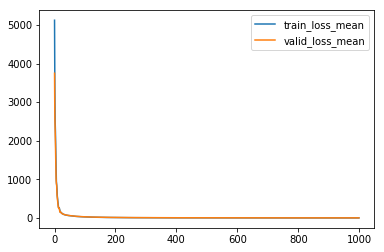

In [27]:
import matplotlib.pyplot as mplot
%matplotlib inline

mplot.plot(train_loss_mean, label='train_loss_mean')
mplot.plot(valid_loss_mean, label='valid_loss_mean')
mplot.legend()

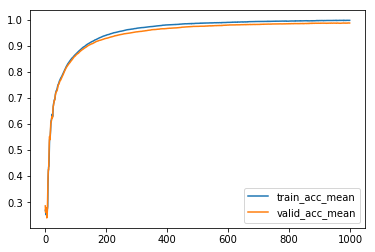

In [28]:
mplot.plot(train_acc_mean, label='train_acc_mean')
mplot.plot(valid_acc_mean, label='valid_acc_mean')
mplot.legend()

In [31]:
with tf.Session() as sess:
    sess.run(fetches=tf.global_variables_initializer())
    
    # Loading the trained and validated model
    saver.restore(save_path=tf.train.latest_checkpoint(checkpoint_dir='checkpoints/'), sess=sess)
    
    # Saving the test loss for every batch/minibtch
    test_loss, test_acc = [], []
    
    # applying the loaded model on test data
    for Xarr, Yarr in get_batches(X=Xtest, Y=Ytest, batch_size=Xvalid.shape[0]): 
        # X_NxWXCin, Y_NxCout
        feed_dict={X:Xarr, Y:Yarr}
        lossarr, accarr = sess.run(feed_dict=feed_dict, fetches=[loss, acc])
        test_loss.append(lossarr)
        test_acc.append(accarr)
        
    # Printing the test loss
    print('test_loss:', np.mean(test_loss), 'test acc', np.mean(test_acc))

INFO:tensorflow:Restoring parameters from checkpoints/cnn-fnirs-har.ckpt
test_loss: 1.6345682 test acc 0.9859155
